# DNN, Deep Neural Network

##  Régression avec un réseau de neurones profonds (DNN)


In [1]:
# chargement des bibliotheques .......

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)


2.6.0


## Collecter et prétraiter les données

La première étape consiste à collecter et prétraiter les données appropriées pour garantir qu'elles sont dans un format que le réseau neuronal peut utiliser. Cela peut impliquer le nettoyage des données, la gestion des valeurs manquantes et la normalisation des données. 

In [15]:
# chargement du dataframe avec conversion decimal des virgules par des point...............


dataset = pd.read_csv('energydata_complete.csv', delimiter=",", decimal=",")
dataset.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000000000001,47.596666666666700,19.199999999999999,44.789999999999999,19.789999999999999,44.729999999999997,19.000000000000000,...,17.033333333333299,45.530000000000001,6.5999999999999996e+00,733.50000000000000,92.000000000000000,7.00000000000000000,63.0000000000000000,5.2999999999999998e+00,13.2754331571049988270,13.2754331571049988270
1,2016-01-11 17:10:00,60,30,19.890000000000001,46.693333333333300,19.199999999999999,44.722499999999997,19.789999999999999,44.789999999999999,19.000000000000000,...,17.066666666666698,45.560000000000002,6.4833333333333298e+00,733.60000000000002,92.000000000000000,6.66666666666666963,59.1666666666666998,5.2000000000000002e+00,18.6061949818395078182,18.6061949818395078182
2,2016-01-11 17:20:00,50,30,19.890000000000001,46.299999999999997,19.199999999999999,44.626666666666701,19.789999999999999,44.933333333333302,18.926666666666701,...,17.000000000000000,45.500000000000000,6.3666666666666698e+00,733.70000000000005,92.000000000000000,6.33333333333333037,55.3333333333333002,5.0999999999999996e+00,28.6426681675948202610,28.6426681675948202610
3,2016-01-11 17:30:00,50,40,19.890000000000001,46.066666666666698,19.199999999999999,44.590000000000003,19.789999999999999,45.000000000000000,18.890000000000001,...,17.000000000000000,45.399999999999999,6.2500000000000000e+00,733.79999999999995,92.000000000000000,6.00000000000000000,51.5000000000000000,5.0000000000000000e+00,45.4103894997388124466,45.4103894997388124466
4,2016-01-11 17:40:00,60,40,19.890000000000001,46.333333333333300,19.199999999999999,44.530000000000001,19.789999999999999,45.000000000000000,18.890000000000001,...,17.000000000000000,45.399999999999999,6.1333333333333302e+00,733.89999999999998,92.000000000000000,5.66666666666666963,47.6666666666666998,4.9000000000000004e+00,10.0840965518727898598,10.0840965518727898598


In [3]:
dataset.shape

(19735, 29)

In [ ]:
# date heure année-mois-jour heure:minute:seconde 

# Appareils électroménagers, consommation d'énergie en Wh

# lumières, consommation d'énergie des luminaires de la maison en Wh

# T1, Température dans le coin cuisine, en Celsius

# RH_1, Humidité dans le coin cuisine, en %

# T2, Température dans le salon, en Celsius

# RH_2, Humidité dans la pièce à vivre, en %

# T3, Température dans la zone buanderie

# RH_3, Humidité dans la buanderie, en %

# T4, Température dans le bureau, en Celsius

# RH_4, Humidité dans un bureau, en %

# T5, Température dans la salle de bain, en Celsius

# RH_5, Humidité dans la salle de bain, en %

# T6, Température à l'extérieur du bâtiment (côté nord), en Celsius

# RH_6, Humidité à l'extérieur du bâtiment (côté nord), en %

# T7, Température dans la salle de repassage, en Celsius

# RH_7, Humidité dans la salle de repassage, en %

# T8, Température dans la chambre d'adolescent 2, en Celsius

# RH_8, Humidité dans la chambre adolescent 2, en %

# T9, Température dans la chambre des parents, en Celsius

# RH_9, Humidité dans la chambre des parents, en %

# To, Température extérieure (depuis la station météo de Chièvres), en Celsius

# Pression (depuis la station météo de Chièvres), en mm Hg

# RH_out, Humidité extérieure (depuis la station météo de Chièvres), en %

# Vitesse du vent (depuis la station météo de Chièvres), en m/s

# Visibilité (depuis la station météo de Chièvres), en km

# Tdewpoint (depuis la station météo de Chièvres), Â°C

# rv1, variable aléatoire 1, non dimensionnelle

# rv2, variable aléatoire 2, non dimensionnelle


# outils pour le traitement du dataframe


In [105]:
# Passer un DataFrame à get_dummies()


dataset = pd.get_dummies(dataset, columns=['Bedrooms', 'Bathrooms','Neighborhood'])

In [18]:
# visualisation

dataset.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000000000001,47.596666666666700,19.199999999999999,44.789999999999999,19.789999999999999,44.729999999999997,19.000000000000000,45.566666666666698,...,17.033333333333299,45.530000000000001,6.5999999999999996e+00,733.50000000000000,92.000000000000000,7.00000000000000000,63.0000000000000000,5.2999999999999998e+00,13.2754331571049988270,13.2754331571049988270
1,60,30,19.890000000000001,46.693333333333300,19.199999999999999,44.722499999999997,19.789999999999999,44.789999999999999,19.000000000000000,45.992500000000000,...,17.066666666666698,45.560000000000002,6.4833333333333298e+00,733.60000000000002,92.000000000000000,6.66666666666666963,59.1666666666666998,5.2000000000000002e+00,18.6061949818395078182,18.6061949818395078182
2,50,30,19.890000000000001,46.299999999999997,19.199999999999999,44.626666666666701,19.789999999999999,44.933333333333302,18.926666666666701,45.890000000000001,...,17.000000000000000,45.500000000000000,6.3666666666666698e+00,733.70000000000005,92.000000000000000,6.33333333333333037,55.3333333333333002,5.0999999999999996e+00,28.6426681675948202610,28.6426681675948202610
3,50,40,19.890000000000001,46.066666666666698,19.199999999999999,44.590000000000003,19.789999999999999,45.000000000000000,18.890000000000001,45.723333333333301,...,17.000000000000000,45.399999999999999,6.2500000000000000e+00,733.79999999999995,92.000000000000000,6.00000000000000000,51.5000000000000000,5.0000000000000000e+00,45.4103894997388124466,45.4103894997388124466
4,60,40,19.890000000000001,46.333333333333300,19.199999999999999,44.530000000000001,19.789999999999999,45.000000000000000,18.890000000000001,45.530000000000001,...,17.000000000000000,45.399999999999999,6.1333333333333302e+00,733.89999999999998,92.000000000000000,5.66666666666666963,47.6666666666666998,4.9000000000000004e+00,10.0840965518727898598,10.0840965518727898598


In [19]:
# Pour voir le type de données de chaque colonne. 

dataset.dtypes

Appliances      int64
lights          int64
T1             object
RH_1           object
T2             object
RH_2           object
T3             object
RH_3           object
T4             object
RH_4           object
T5             object
RH_5           object
T6             object
RH_6           object
T7             object
RH_7           object
T8             object
RH_8           object
T9             object
RH_9           object
T_out          object
Press_mm_hg    object
RH_out         object
Windspeed      object
Visibility     object
Tdewpoint      object
rv1            object
rv2            object
dtype: object

In [20]:
# pour convertir en float64 toutes les colonnes...........
dataset = dataset.astype('float32')

In [ ]:
# pour convertir certaines colonnes...........
dataset[float64_cols] = dataset[float64_cols].astype('float32')


In [ ]:
# pour transformer toutes les colonnes.........

dataset=dataset.apply(pd.to_numeric)

In [17]:
# suppression des colonnes inutiles............

dataset=dataset.drop(['date'], axis=1)

In [21]:
# pour visualiser les lignes NaN................

dataset.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [228]:
# pour supprimer les NaN..............

dataset=dataset.dropna()

In [236]:
# pour visualiser les lignes NaN................

dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [22]:
# pour verifier..........

dataset.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,30.0,19.889999,47.596668,19.200001,44.790001,19.790001,44.730000,19.000000,45.566666,...,17.033333,45.529999,6.600000,733.500000,92.0,7.000000,63.000000,5.3,13.275434,13.275434
1,60.0,30.0,19.889999,46.693333,19.200001,44.722500,19.790001,44.790001,19.000000,45.992500,...,17.066668,45.560001,6.483333,733.599976,92.0,6.666667,59.166668,5.2,18.606195,18.606195
2,50.0,30.0,19.889999,46.299999,19.200001,44.626667,19.790001,44.933334,18.926666,45.889999,...,17.000000,45.500000,6.366667,733.700012,92.0,6.333333,55.333332,5.1,28.642668,28.642668
3,50.0,40.0,19.889999,46.066666,19.200001,44.590000,19.790001,45.000000,18.889999,45.723331,...,17.000000,45.400002,6.250000,733.799988,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60.0,40.0,19.889999,46.333332,19.200001,44.529999,19.790001,45.000000,18.889999,45.529999,...,17.000000,45.400002,6.133333,733.900024,92.0,5.666667,47.666668,4.9,10.084097,10.084097


## Prétraitement des données du dataset

In [38]:
# divisions les données en un ensembles d'entrainement et de test...............

# utilisation de l'ensemble des données de test pour l'évaluation finale.........

train_dataset = dataset.sample(frac=0.3, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print('Nombre de lignes l entrainement',train_dataset.shape)
print('Nombre de lignes pour les test', test_dataset.shape)

Nombre de lignes l entrainement (5920, 28)
Nombre de lignes pour les test (13815, 28)


In [39]:
# séparation  les entités des étiquettes...........
# séparation de la valeur cible des caractéristiques ( features )..........
# c'est cette cible que le modele va devoir prédire.

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('T1') # la cible est la Température dans le coin cuisine, en Celsius
test_labels = test_features.pop('T1') # 

Dans l'analyse de régression utilisant un DNN, l'objectif est d'apprendre une fonction qui mappe les caractéristiques d'entrée à la sortie, de sorte que les prédictions faites par le modèle soient aussi précises que possible. Les caractéristiques d'entrée passent par la couche d'entrée du DNN puis sont traitées par les couches cachées, qui utilisent des fonctions d'activation non linéaires pour apprendre les relations complexes dans les données. La couche de sortie du DNN produit une prédiction pour la variable dépendante basée sur les caractéristiques d'entrée traitées

## Définir l'architecture du mdele

L'étape suivante consiste à définir l'architecture du réseau de neurones. Cela inclut la sélection du type de couches (couches denses ou convolutives), du nombre de neurones dans chaque couche et des fonctions d'activation à utiliser.


## Compiler le modele

Une fois l'architecture définie, il faut compiler le modèle. Cela implique de spécifier la fonction de perte, l'optimiseur et toutes les métriques que nous utiliserons pour évaluer le modèle.


In [40]:
# normalisation les données avec (tf.keras.layers.Normalization)...........


normalizer = tf.keras.layers.Normalization(axis=-1)

In [41]:
# modèles DNN à entrées multiples....................

normalizer.adapt(np.array(train_features))

In [42]:
#  Régression avec un réseau de neurones profond (DNN)..........
# modèles DNN à entrées multiples.


def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),# 2 couches Dense avec fonction activation relu
      layers.Dense(64, activation='relu'),
      layers.Dense(1) # une couche Dense linéaire à sortie unique
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
    
 

  return model


In [43]:
# Régression utilisant un DNN et plusieurs entrées

# Répétez le processus précédent en utilisant toutes les entrées.
# Les performances du modèle s'améliorent légèrement sur l'ensemble de données de validation.

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 27)                55        
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1792      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 6,072
Trainable params: 6,017
Non-trainable params: 55
_________________________________________________________________


In [44]:
# la fonction d affichage....

def plot_loss(history):
  plt.plot(history.history['loss'], label='MAE')
  plt.plot(history.history['val_loss'], label='val_MAE')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Erreur [Price]')
  plt.legend()
  plt.grid(True)

## Entrainer le modele

L'étape suivante consiste à entraîner le modèle à l'aide des données prétraitées. Cela implique d'introduire les données dans le modèle et d'ajuster les poids et les biais des neurones du réseau pour minimiser la fonction de perte.


In [45]:
# entrainement ....................

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)



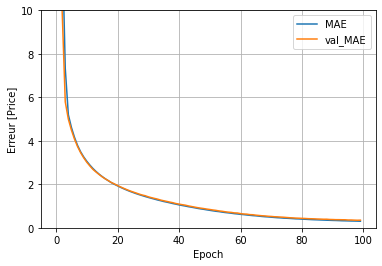

In [46]:
plot_loss(history)

## Evaluer le modele

Une fois le modèle entraîné, il doit être évalué pour déterminer ses performances. Cela peut impliquer l'utilisation d'un ensemble de données distinct (ou d'un sous-ensemble des données d'entraînement) pour évaluer la capacité du modèle à effectuer des prédictions précises.


In [47]:
# résultats de la MAE sur l'ensemble de test :

test_resultats = {}

test_resultats['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_resultats

{'dnn_model': 0.3457278311252594}

## Faire des prédiction

Une fois le modèle affiné, nous pouvons l'utiliser pour prédire de nouvelles données.


In [48]:
#  prédiction...

y_pred = dnn_model.predict(test_features)
print('Prédiction Temperature dans le coin cuisine en Celsius',y_pred[1:5])
print('Température attendue dans le coin cuisine en Celsius',test_labels[1:5])

Prédiction Temperature dans le coin cuisine en Celsius [[19.845]
 [19.873]
 [21.426]
 [20.584]]
Température attendue dans le coin cuisine en Celsius 1    19.889999
2    19.889999
3    19.889999
4    19.889999
Name: T1, dtype: float32


In [49]:
pd.DataFrame(test_resultats, index=['Mean absolute error [T]']).T


,Mean absolute error [T]
dnn_model,0.345728


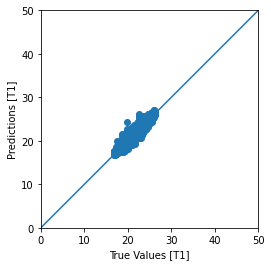

In [56]:
# Faire des prédictions
# Vous pouvez maintenant faire des prédictions avec le dnn_model
# sur l'ensemble de test à l'aide de ( Keras Model.predict) et examiner la perte :

test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [T1]')
plt.ylabel('Predictions [T1]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


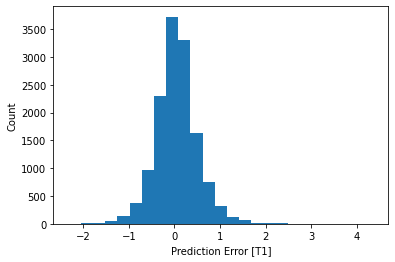

In [57]:
# vérifiez la distribution des erreurs :

error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [T1]')
_ = plt.ylabel('Count')


In [58]:
#  enregistrez-le pour une utilisation ultérieure avec Model.save :

dnn_model.save('dnn_model')


2023-11-30 21:10:50.088465: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dnn_model/assets


In [59]:
#  rechargez le modèle, il donne une sortie identique :

reloaded = tf.keras.models.load_model('dnn_model')

test_resultats['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


In [60]:
pd.DataFrame(test_resultats, index=['Mean absolute error [Global_active_power]']).T


,Mean absolute error [Global_active_power]
dnn_model,0.345728
reloaded,0.345728


## merci Tensorflow........